Histogram equalization is a technique used to increase the contrast of an image by spreading out the most frequent intensity values. It enhances the global contrast of images.

Input: Low contrast image.

Output: Enhanced contrast image

Steps:

1) Compute the histogram of the input image.

2) Compute the cumulative distribution function (CDF) of the histogram.

Normalize the CDF.

3) Map each pixel value in the original image to a new value based on the normalized CDF.

/var/folders/d2/dxby40m13rg8wdmx7h6zxzyh0000gn/T/ipykernel_5999/1927619163.py:25: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(img.flatten(), 256, [0, 256], color='gray')
/var/folders/d2/dxby40m13rg8wdmx7h6zxzyh0000gn/T/ipykernel_5999/1927619163.py:29: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(equalized.flatten(), 256, [0, 256], color='gray')


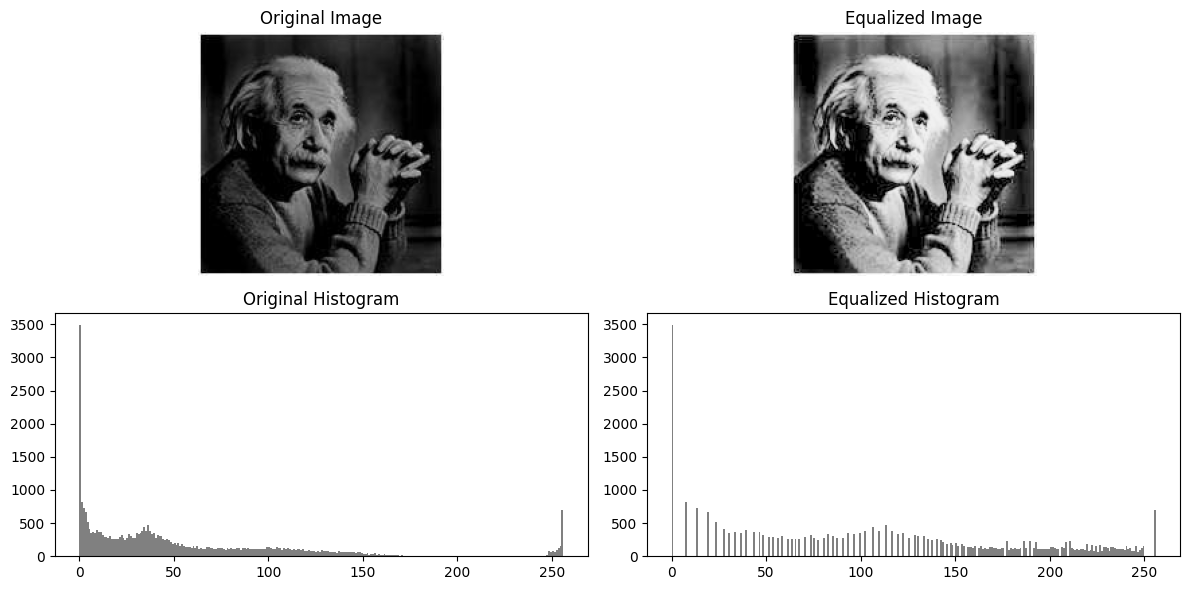

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a grayscale image
img = cv2.imread('Images/Einstine.jpg', cv2.IMREAD_GRAYSCALE)
# Apply Histogram Equalization
equalized = cv2.equalizeHist(img)

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Equalized Image')
plt.imshow(equalized, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Original Histogram')
plt.hist(img.flatten(), 256, [0, 256], color='gray')

plt.subplot(2, 2, 4)
plt.title('Equalized Histogram')
plt.hist(equalized.flatten(), 256, [0, 256], color='gray')

plt.tight_layout()
plt.show()


(-0.5, 182.5, 180.5, -0.5)

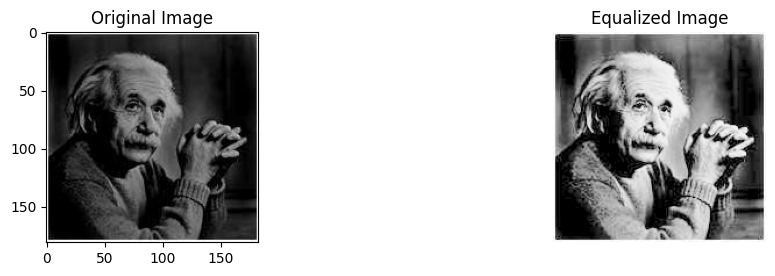

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load grayscale image
img = cv2.imread('Images/Einstine.jpg', cv2.IMREAD_GRAYSCALE)
height, width = img.shape

# Step 2: Compute histogram
hist = np.zeros(256, dtype=int)
for i in range(height):
    for j in range(width):
        hist[img[i, j]] += 1

# Step 3: Normalize histogram (PDF)
pdf = hist / (height * width)

# Step 4: Compute CDF (cumulative sum of PDF)
cdf = np.cumsum(pdf)

# Step 5: Normalize the CDF to map to [0, 255]
equalized_values = np.round(cdf * 255).astype(np.uint8)

# Step 6: Create equalized image using the new pixel values
equalized_img = np.zeros_like(img)
for i in range(height):
    for j in range(width):
        equalized_img[i, j] = equalized_values[img[i, j]]

# Display the original image and equalized image
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis


plt.subplot(2, 2, 2)
plt.title('Equalized Image')
plt.imshow(equalized_img, cmap='gray')
plt.axis('off')


# CLAHE ( Contrast Limited Adapative Histogram Equalization)

Histogram Equalization can over-amplify noise in near-uniform regions. CLAHE addresses this

Steps:

Divide the image into small tiles (e.g., 8×8).

Apply histogram equalization on each tile.

Limit contrast amplification using a clip limit.

Combine tiles using bilinear interpolation to avoid boundary artifacts.

Image Shape = (546, 775)


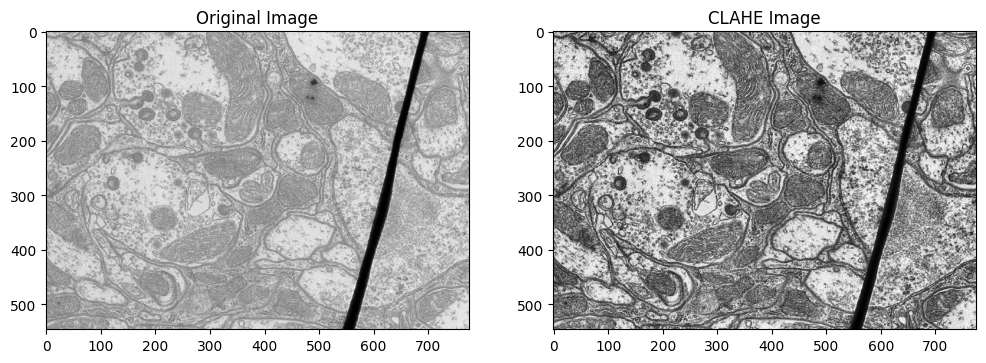

In [6]:
import cv2
import  matplotlib.pyplot as plt

# Read Image

img= cv2.imread('Images/Image1.jpg',0)

# print image shape

print("Image Shape =", img.shape)
clahe  = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

clahe_img = clahe.apply(img)

# display image
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.title('CLAHE Image')
plt.imshow(clahe_img, cmap='gray')

* Convert to LAB color space *

lab = cv2.cvtColor(img_color, cv2.COLOR_BGR2LAB) l, a, b = cv2.split(lab)

Apply CLAHE to L channel

* l_eq = clahe.apply(l)

Merge channels and convert back to BGR *

lab_eq = cv2.merge((l_eq, a, b)) 

color_result = cv2.cvtColor(lab_eq, cv2.COLOR_LAB2BGR)



Image Shape = (351, 775, 3)


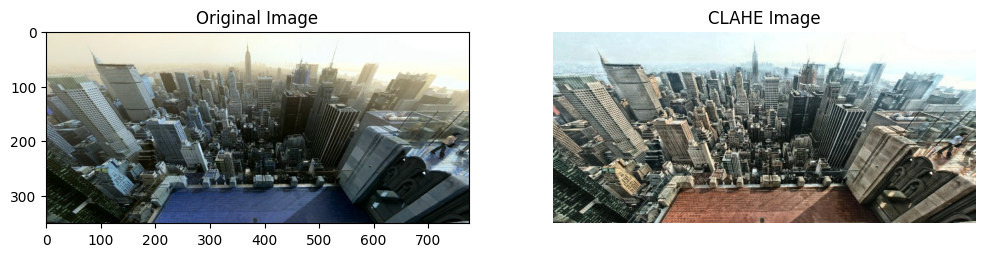

In [7]:

# Read Image

img= cv2.imread('Images/imagec2.jpg')


# print Image Shape

print("Image Shape =", img.shape)

# Conert image to LAB color space

lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

# Split image into l, a, b channels
l, a, b = cv2.split(lab)


# Apply CLAHE to  L Channel

clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(50,50))
l_eq = clahe.apply(l)

# Merge channels

lab_eqImage = cv2.merge((l_eq,a,b,))

# Convert image to RGB,  Matplotlib uses RGB channel

eqImage = cv2.cvtColor(lab_eqImage,  cv2.COLOR_LAB2RGB)


# Display Image
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('CLAHE Image')
plt.imshow(eqImage)
plt.axis('off')
plt.show()





# HSV color space

Image Shape = (351, 775, 3)


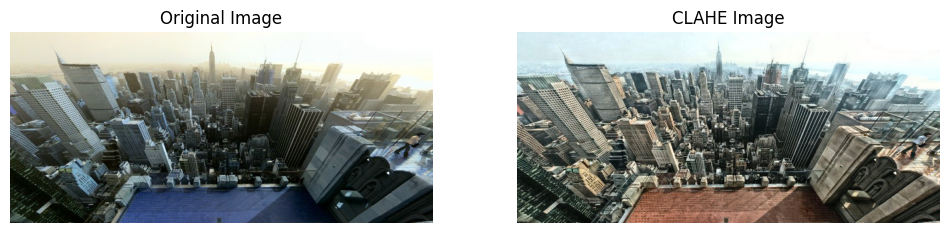

In [8]:

# Read Image

img= cv2.imread('Images/imagec2.jpg')


# print Image Shape

print("Image Shape =", img.shape)

# Conert image to LAB color space

lab = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Split image into l, a, b channels
h, s, v  = cv2.split(lab)


# Apply CLAHE to  L Channel

clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(50,50))
v_eq = clahe.apply(v)

# Merge channels

hsv_eqImage = cv2.merge((h, s, v_eq))

# Convert image to RGB,  Matplotlib uses RGB channel

eqImage = cv2.cvtColor(lab_eqImage,  cv2.COLOR_LAB2RGB)


# Display Image
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('CLAHE Image')
plt.imshow(eqImage)
plt.axis('off')
plt.show()

